In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
#torch.set_printoptions(edgeitems=2, threshold=50)

import imageio

import os


In [2]:
img_arr = imageio.imread('data/bobby.jpg')
img_arr.shape

/tmp/ipykernel_11994/4249234832.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread('data/bobby.jpg')


(720, 1280, 3)

**NB!:** 
*Модули PyTorch, работающие с изображениями, требуют от тензоров схемы измерений C × H × W (каналы, высота и ширина
соответственно). Для получения нужной нам схемы расположения можно воспользоваться методом `permute` тензора, указав в качестве параметров старые измерения для каждого из новых. При входном тензоре вида H × W × C, полученном нами ранее, нужную схему расположения можно получить, указав сначала измерение 2, а затем 0 и 1.*

In [3]:
img = torch.from_numpy(img_arr)
img.shape

torch.Size([720, 1280, 3])

In [4]:
out = img.permute(2, 0, 1)
out.shape

torch.Size([3, 720, 1280])

**NB!:** 
*Следуя стратегии, применявшейся нами для предыдущих типов данных, чтобы создать входной набор данных для наших нейронных сетей из нескольких изображений, мы сохраняем изображения в батчах по первому измерению и получаем тензор вида N × C × H × W.*

*Несколько более эффективная альтернатива использованию для создания тензора `stack` — выделить заранее память под тензор нужного размера, а затем заполнить его загруженными из каталога изображениями следующим образом:*

In [5]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256)        #, dtype=torch.uint8)

In [6]:
data_dir = 'data/image-cats'
filenames = [name for name in os.listdir(data_dir) if name.split('.')[-1] == 'png']

for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    if i==0: 
        print('img_arr.shape =', img_arr.shape, ', img_arr.dtype =', img_arr.dtype)
        
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    
    img_t = img_t[:3] # мы сохраняем только первые три канала: иногда в изображениях встречается также альфа-канал для прозрачности
    
    batch[i] = img_t  # тут не назначение нового имени объекту, а копирование (конструктором)

print('batch.shape =', batch.shape, ', batch.dtype =', batch.dtype)

img_arr.shape = (256, 256, 3) , img_arr.dtype = uint8
batch.shape = torch.Size([3, 3, 256, 256]) , batch.dtype = torch.float32


/tmp/ipykernel_11994/1070310005.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(os.path.join(data_dir, filename))


**NB!:**
*нормализация только для RGB каналов цвета*

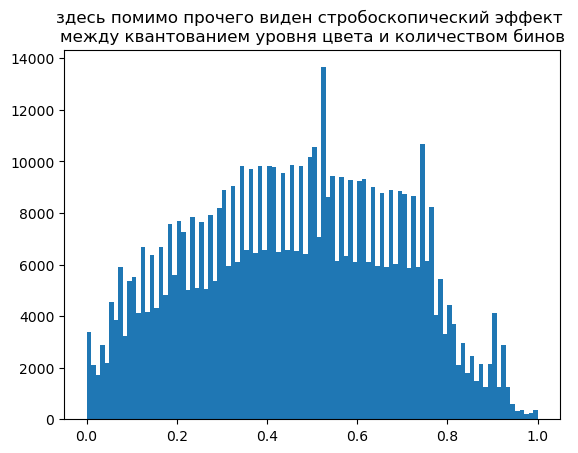

In [7]:
#batch = batch.float()
batch /= 255.0

plt.hist(batch.flatten(), bins=100)
plt.title('здесь помимо прочего виден стробоскопический эффект \nмежду квантованием уровня цвета и количеством бинов')
plt.show()

**NB!:**
*нормализация для каналов с чем угодно*

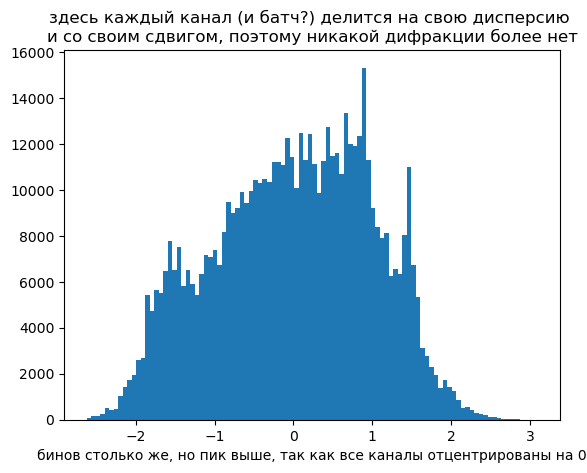

In [8]:
n_channels = batch.shape[1]

for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

plt.hist(batch.flatten(), bins=100)
plt.title('здесь каждый канал (и батч?) делится на свою дисперсию \nи со своим сдвигом, поэтому никакой дифракции более нет')
plt.xlabel('бинов столько же, но пик выше, так как все каналы отцентрированы на 0')
plt.show()